# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [2]:
sps.t(df=50).rvs(4)

array([ 1.05895187, -1.05039645,  0.40853675,  0.21315047])

Постройте на одном графике плотности распределения Стьюдента и нормального.


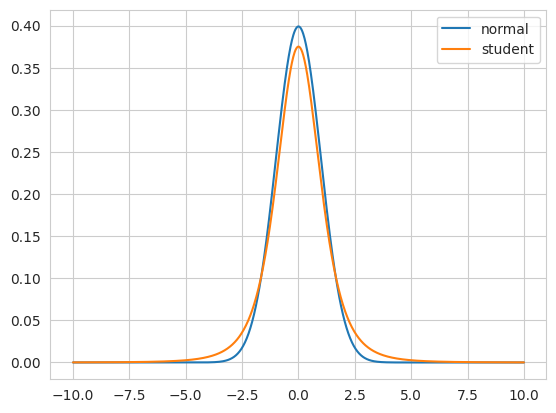

In [3]:
x = np.linspace(-10, 10, 1000)
norm = sps.norm.pdf(x)
student = sps.t.pdf(x, df=4)
plt.plot(x, norm, label="normal")
plt.plot(x, student, label="student")
plt.legend()

Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:** хвосты у нормального распределения убывают быстро, а у распределения стьюдента в зависимости от параметра df, чем он больше, тем распределение ближе к нормальному, при df = 1 это распределение Коши. Распределение стьюдента - компромисс между стандартным нормальным и Коши

### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [4]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [5]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются. 

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

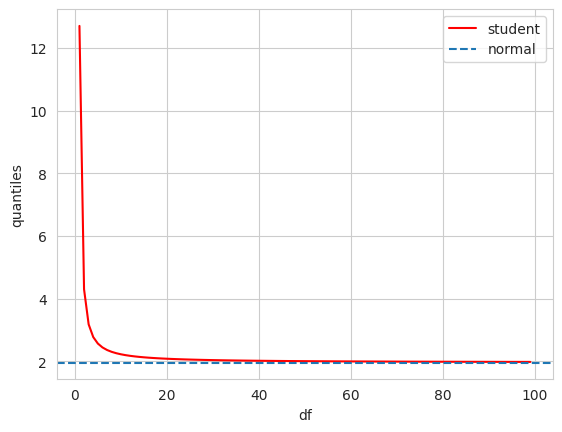

In [6]:
alpha = 0.95
dfs = np.arange(1, 100)

x = np.linspace(-5, 5, 1000)

quantiles_t = sps.t.ppf((1 + alpha) / 2, df=dfs)
quantile_normal = sps.norm.ppf((1 + alpha) / 2)

plt.plot(dfs, quantiles_t, color='red', label="student")
plt.axhline(y=quantile_normal, linestyle='--', label="normal")

plt.xlabel("df")
plt.ylabel("quantiles")

plt.legend()


Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:** значения квантилей для student'а больше, чем значения для нормального распределения, квантили для student'а убывают и стремятся к квантилям для нормального распределения при увеличении df.

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $(\overline{X} \pm \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}s)$

Точный доверительный интервал: $(\overline{X} \pm \frac{T_{(n-1),(\frac{1+\alpha}{2})}}{\sqrt{n-1}}s)$



Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [7]:
sample_size = 30
sample = sps.norm.rvs(size=sample_size)  # выборка

alpha = 0.95

mean = np.mean(sample)
std = np.std(sample, ddof=1)

quantile_normal = sps.norm.ppf((1 + alpha) / 2)
error_norm = quantile_normal/np.sqrt(sample_size-1) * np.sqrt(std)

quantiles_t = sps.t.ppf((1 + alpha) / 2, df=sample_size-1)
error_t = quantiles_t/np.sqrt(sample_size-1) * np.sqrt(std)


asymptotic_ci = (mean - error_norm, mean + error_norm)  # асимптотические ДИ
precise_ci = (mean - error_t, mean + error_t)  # точные ДИ

print(asymptotic_ci, '\n',
      precise_ci)

(-0.32427243464336536, 0.36211446764512684) 
 (-0.33920261475081864, 0.3770446477525801)


Сравните полученные значения для доверительных интервалов.

**Ответ**: значения не совпадают, но отличаются не сильно

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [8]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    n = np.arange(2, sample.shape[0]+2)

    mean = np.cumsum(sample) / n
    std = np.std(sample, ddof=1)

    quantile_normal = sps.norm.ppf((1 + alpha) / 2)
    error_norm = quantile_normal/np.sqrt(n) * np.sqrt(std)
    
    return (mean - error_norm, mean + error_norm)


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''

    n = np.arange(2, sample.shape[0] + 2)

    mean = np.cumsum(sample) / n
    std = np.std(sample, ddof=1)

    quantiles_t = sps.t.ppf((1 + alpha) / 2, df=n-1)
    error_t = quantiles_t/np.sqrt(n-1) * np.sqrt(std)
    
    return (mean - error_t, mean + error_t) 

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [9]:
def draw_confidence_interval(
    left=None, right=None, estimation=None, sample=None,
    ylim=(-5, 5), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(sample)) + 1

    interval1 = calculate_asymptotic_confidence_intervals(sample)
    interval2 = calculate_confidence_intervals(sample)

    plt.fill_between(time, interval1[0], interval1[1], label="Асимптотический доверительный  интервал", alpha=0.3)
    plt.plot(time, np.cumsum(sample)/time, linestyle='--', label="оценка")
    plt.fill_between(time, interval2[0], interval2[1], label="Доверительный  интервал", alpha=0.3)
    plt.axhline(y=0, linestyle='--', label='theory', color='red' )
    
    plt.ylim(ylim)
    plt.legend(fontsize=16)
    plt.xlabel('Размер выборки')
    plt.ylabel('Значение доверительного интервала')
    plt.title('Зависимость значений \
доверительного интервала от размера выборки')
    plt.legend()
    plt.grid()

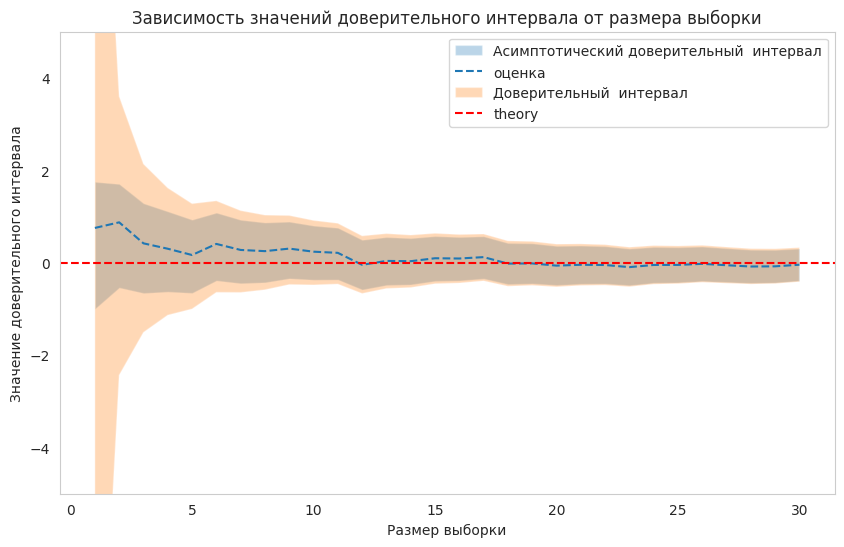

In [10]:
sample_size = 30
X = sps.norm.pdf(sample_size)
sample = sps.norm.rvs(size=sample_size) 

fig = plt.figure(figsize=(10, 6))
draw_confidence_interval(sample=sample, color_interval='red')
plt.show()


**Вывод:** Чем больше размер выборки, тем меньше доверительные интервалы. При больших размерах выборки эти доверительные интервалы практически совпадают. Это следует из того, что при увеличении выборки, увеличивается коэффициент df в распределении стьюдента, поэтому распределение начинает стремиться к нормальному.

ДАЛЬШЕ НЕ ДЕЛАЕМ!

## Задача 2
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [11]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

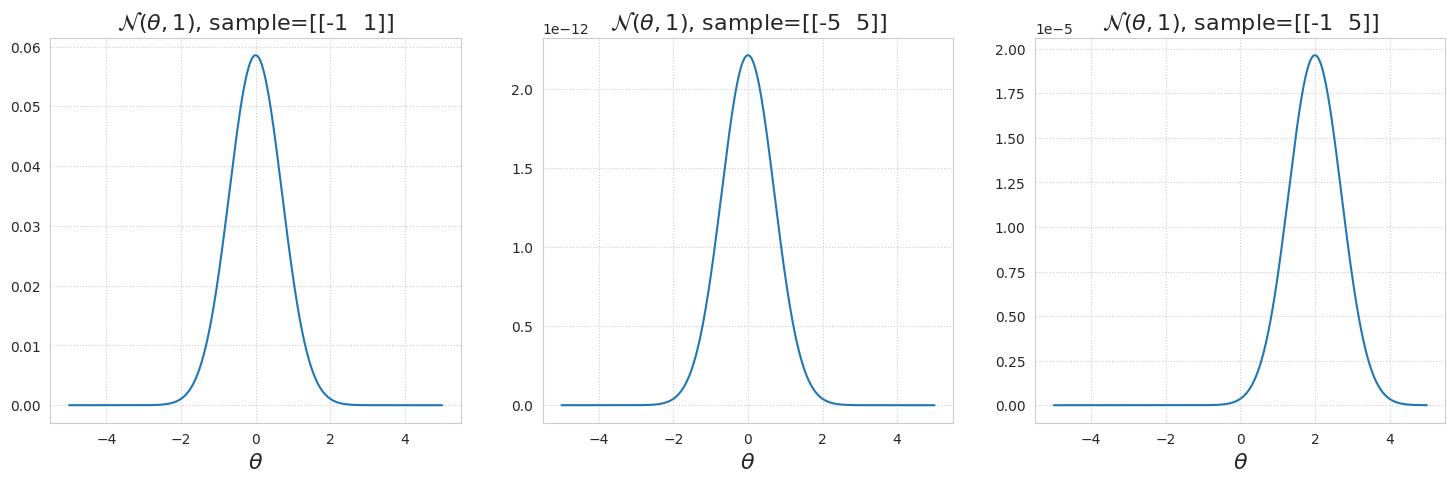

In [12]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

In [13]:
# ваш код

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [14]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [15]:
# ваш код